In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\şerefcanmemiş\\Downloads\\balanced_sample.csv")

---

## 1- Exploratory Data Analysis

In [3]:
df.head()

,timestamp,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,failure_type,downtime_risk,maintenance_required
0,2025-01-28 22:01:00,12,70.52,57.21,41.55,3.20,2.55,2,0,422,Overheating,0.0,1
1,2025-01-18 19:09:00,27,70.47,30.81,56.76,1.16,2.74,2,0,153,Electrical Fault,0.0,1
2,2025-02-11 16:36:00,15,77.40,67.63,56.04,3.97,2.83,2,0,76,Vibration Issue,0.0,1
3,2025-02-25 11:10:00,4,78.15,41.90,49.71,4.36,2.38,1,0,275,Normal,0.0,0
4,2025-03-05 20:21:00,23,61.11,33.66,73.22,3.32,3.17,2,0,15,Electrical Fault,0.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   timestamp                 1182 non-null   object 
 1   machine_id                1182 non-null   int64  
 2   temperature               1182 non-null   float64
 3   vibration                 1182 non-null   float64
 4   humidity                  1182 non-null   float64
 5   pressure                  1182 non-null   float64
 6   energy_consumption        1182 non-null   float64
 7   machine_status            1182 non-null   int64  
 8   anomaly_flag              1182 non-null   int64  
 9   predicted_remaining_life  1182 non-null   int64  
 10  failure_type              1182 non-null   object 
 11  downtime_risk             1182 non-null   float64
 12  maintenance_required      1182 non-null   int64  
dtypes: float64(6), int64(5), object(2)
memory usage: 120.2+ KB


In [5]:
df.nunique()

timestamp                   1182
machine_id                    50
temperature                 1019
vibration                   1058
humidity                    1051
pressure                     374
energy_consumption           426
machine_status                 3
anomaly_flag                   2
predicted_remaining_life     417
failure_type                   5
downtime_risk                  3
maintenance_required           2
dtype: int64

In [6]:
df.isna().sum()

timestamp                   0
machine_id                  0
temperature                 0
vibration                   0
humidity                    0
pressure                    0
energy_consumption          0
machine_status              0
anomaly_flag                0
predicted_remaining_life    0
failure_type                0
downtime_risk               0
maintenance_required        0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
machine_id,1182.0,26.211506,14.186347,1.00,14.0000,26.000,38.7500,50.00
temperature,1182.0,77.222479,11.196393,46.19,69.5925,76.410,85.2050,108.07
vibration,1182.0,51.154848,15.780467,6.96,40.3025,50.325,61.1775,98.86
humidity,1182.0,55.069002,14.456184,30.00,42.8600,54.795,67.3575,79.99
pressure,1182.0,2.971421,1.145589,1.01,1.9300,2.995,3.9675,4.99
energy_consumption,1182.0,2.736041,1.287416,0.51,1.6200,2.720,3.8400,5.00
machine_status,1182.0,1.177665,0.549567,0.00,1.0000,1.000,2.0000,2.00
anomaly_flag,1182.0,0.233503,0.423238,0.00,0.0000,0.000,0.0000,1.00
predicted_remaining_life,1182.0,191.200508,156.225167,1.00,39.0000,164.000,325.7500,499.00
downtime_risk,1182.0,0.233494,0.423223,0.00,0.0000,0.000,0.0000,1.00


In [8]:
print(df['maintenance_required'].value_counts())

maintenance_required
1    591
0    591
Name: count, dtype: int64


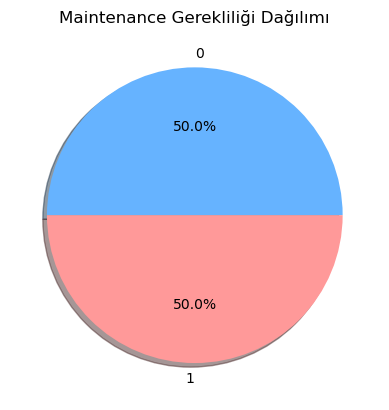

In [9]:
colors = ['#66b3ff', '#ff9999']
plt.pie(df['maintenance_required'].value_counts(),autopct='%1.1f%%',labels=[0,1],colors=colors,shadow=True)
plt.title('Maintenance Gerekliliği Dağılımı')
plt.show()

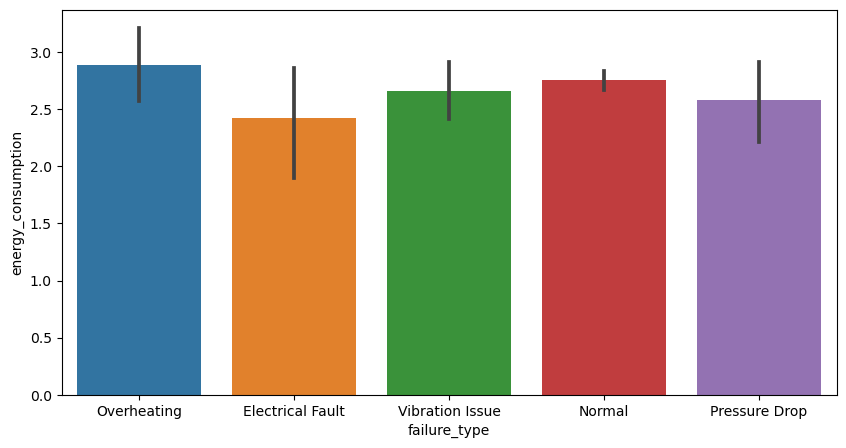

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.failure_type,y=df.energy_consumption)
plt.show()

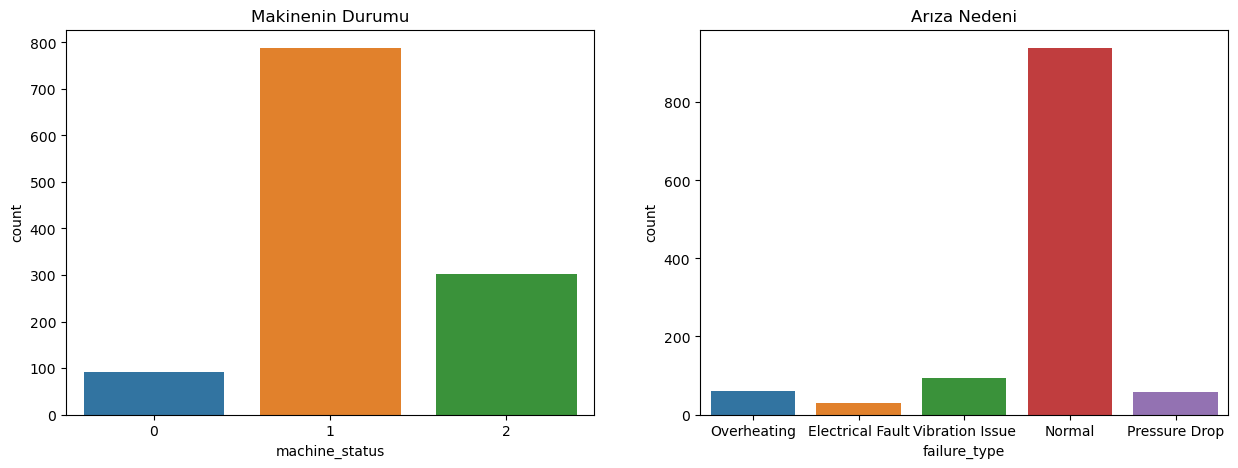

In [11]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x="machine_status",data=df)
plt.title("Makinenin Durumu")

plt.subplot(1,2,2)
sns.countplot(x="failure_type",data=df)
plt.title("Arıza Nedeni")
plt.show()

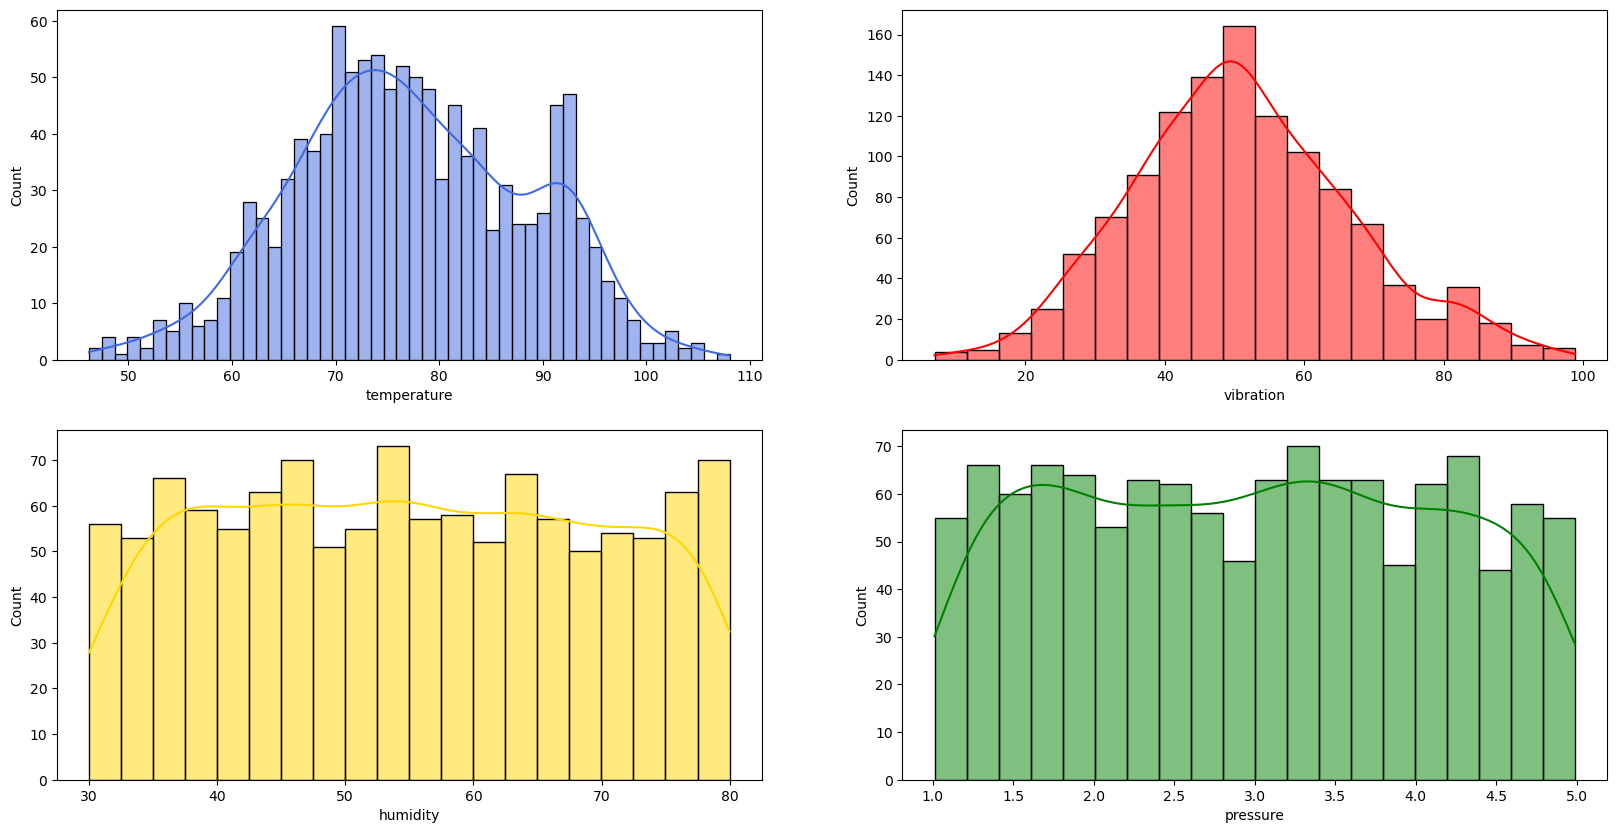

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(df.temperature,kde=True,bins=50,color="royalblue")

plt.subplot(2,2,2)
sns.histplot(df.vibration,kde=True,bins=20,color="red")

plt.subplot(2,2,3)
sns.histplot(df.humidity,kde=True,bins=20,color="gold")

plt.subplot(2,2,4)
sns.histplot(df.pressure,kde=True,bins=20,color="green")
plt.show()

---

## 2- Feature Engineering

In [13]:
df['failure_type'].unique()

array(['Overheating', 'Electrical Fault', 'Vibration Issue', 'Normal',
       'Pressure Drop'], dtype=object)

In [14]:
df = pd.get_dummies(data=df,columns=['failure_type'],drop_first=True) 
# drop first Electrical Fault'u cikarir (alfabetik siraya gore)

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp']) # object data type'ini datetime data type'ina donusturduk

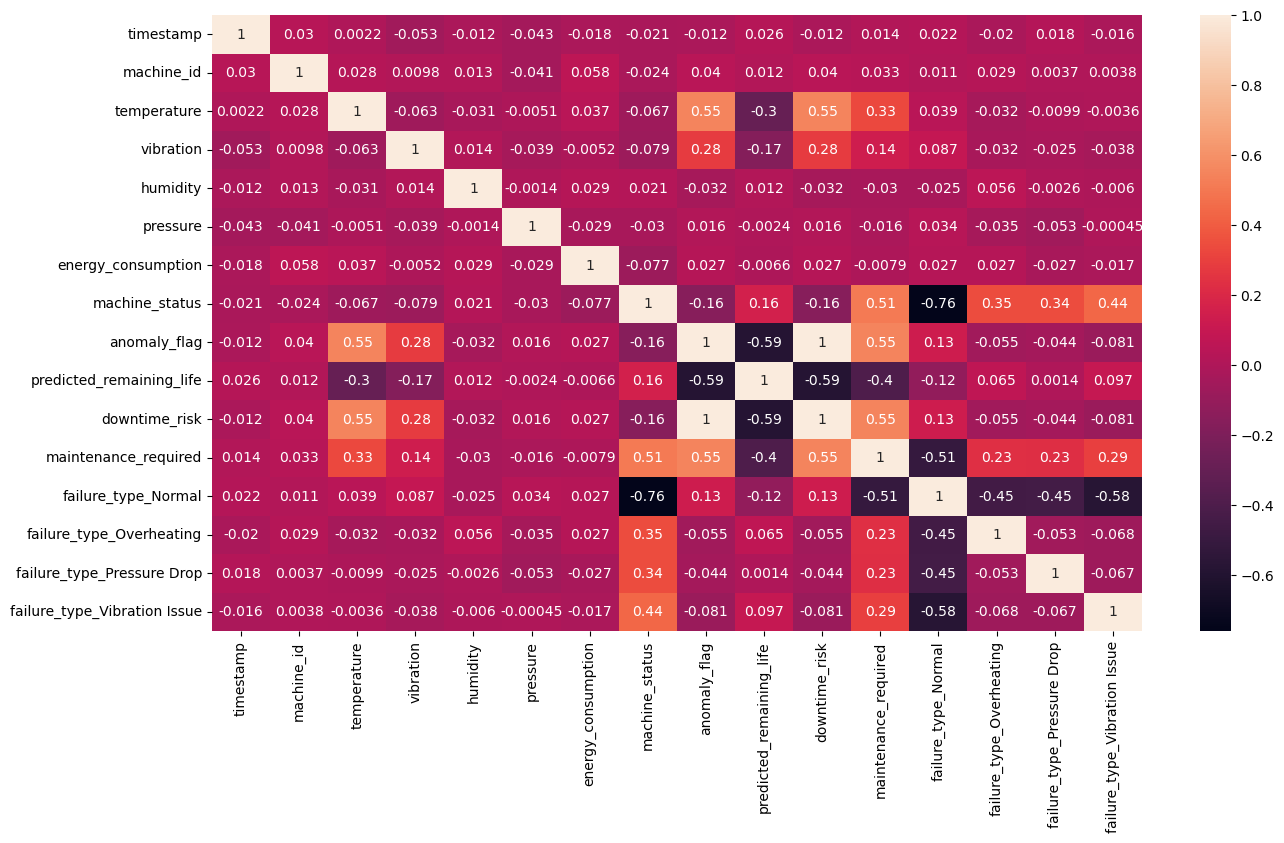

In [16]:
corelation = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corelation,annot=True)
plt.xticks(rotation=90)
plt.show()

In [17]:
df = df.sort_values(by='timestamp')

In [18]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df.drop(['timestamp'],axis=1,inplace=True)

In [19]:
df.head()

,machine_id,temperature,vibration,humidity,pressure,energy_consumption,machine_status,anomaly_flag,predicted_remaining_life,downtime_risk,maintenance_required,failure_type_Normal,failure_type_Overheating,failure_type_Pressure Drop,failure_type_Vibration Issue,hour,day,month
863,21,76.73,34.86,32.64,3.31,1.65,2,0,433,0.0,1,False,False,False,True,0,1,1
870,24,84.60,45.71,77.43,4.94,1.40,1,0,171,0.0,0,True,False,False,False,3,1,1
49,12,82.03,53.19,30.00,2.60,0.81,1,0,19,0.0,1,True,False,False,False,7,1,1
1143,12,67.18,43.00,44.85,2.02,3.32,1,0,71,0.0,0,True,False,False,False,8,1,1
1165,16,77.26,44.39,68.27,1.52,3.02,2,0,141,0.0,1,False,False,True,False,8,1,1


In [20]:
df.groupby('machine_status')['maintenance_required'].value_counts()

machine_status  maintenance_required
0               0                        60
                1                        32
1               0                       531
                1                       257
2               1                       302
Name: count, dtype: int64

Makine öğrenmesi modellerinin doğruluğunu yapay olarak artırabilecek ve performansını ciddi şekilde düşürebilecek en önemli risklerden biri veri sızıntısıdır. Veri sızıntısı, modelin eğitim sırasında hedef değişkenle doğrudan ilişkili olan bilgileri öğrenmesi anlamına gelir. Bu durum, modelin gerçek dünyada yeni ve görülmemiş veriler üzerinde başarısız olmasına neden olabilir.

Bu projede hedef değişken olan maintenance_required (bakım gerekliliği) ile yüksek korelasyona sahip ya da onu doğrudan temsil eden bazı değişkenlerin modelden çıkarılması gerekmiştir. Özellikle:

- machine_status
- downtime_risk
- predicted_remaining_life
- failure_type_* sütunları

bu kapsama girmektedir. Örneğin, machine_status = 2 (Failure) olduğu durumlarda her zaman maintenance_required = 1 olduğu gözlemlenmiştir. Bu, modelin hedefi dolaylı olarak değil, doğrudan öğrenmesine sebep olur. Böyle bir yapı, modelin eğitim verisinde çok başarılı gözükmesine rağmen, gerçek hayattaki senaryolarda işlevsiz kalmasına yol açar.

---

## 3- Model Building

In [21]:
X = df.drop(['maintenance_required','machine_status','downtime_risk','predicted_remaining_life','failure_type_Normal','failure_type_Overheating',
            'failure_type_Pressure Drop','failure_type_Vibration Issue'], axis=1)
y = df['maintenance_required']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(f'x_train shape:{x_train.shape}')
print(f'x_test shape:{x_test.shape}')
print(f'y_train shape:{y_train.shape}')
print(f'y_test shape:{y_test.shape}')

x_train shape:(945, 10)
x_test shape:(237, 10)
y_train shape:(945,)
y_test shape:(237,)


Ağaç tabanlı modelleri normalize etmemize gerek yoktur bunlar mesafeye ve normalliğe duyarsız modellerdir.
**K-Nearest Neighbors**, **Support Vector Machine vs...** gibi modeller ise mesafeye göre hesaplama yaptıkları için **StandardScaler** ile normalize edilmelidir.

Model f1 Score:

Logistic Regression: 56.97%
Support Vector Machine: 56.63%
Naive Bayes: 56.97%
K-Nearest Neighbors: 58.42%
Decision Tree: 59.56%
Random Forest: 60.22%
XGBoost: 58.65%


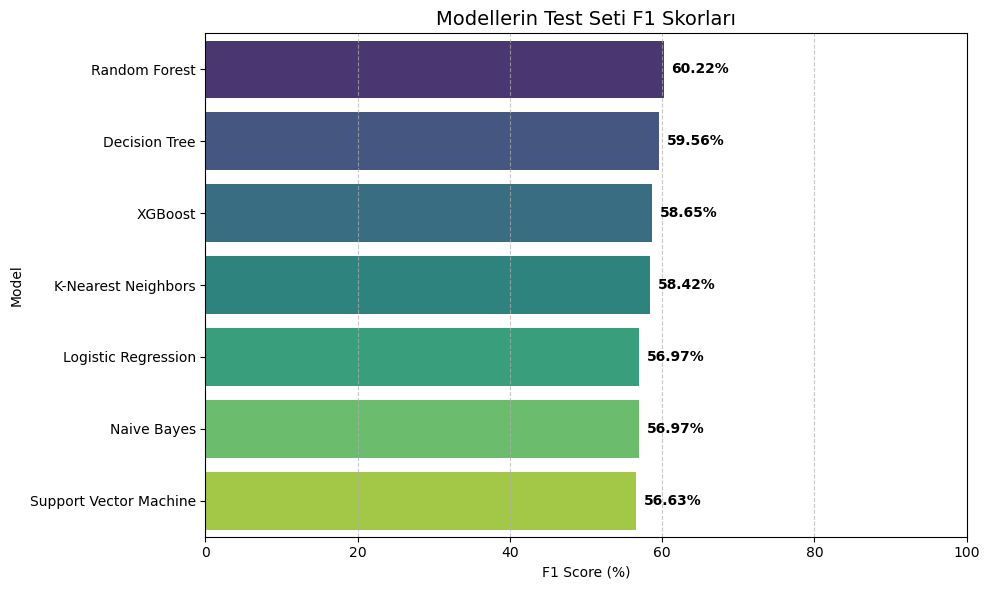

In [23]:
# Train-Test parçalamasıyla kurulan ve test edilen modeller

models = {
    'Logistic Regression': make_pipeline(StandardScaler(),LogisticRegression(max_iter=5000)),
    'Support Vector Machine': make_pipeline(StandardScaler(),SVC()),
    'Naive Bayes': make_pipeline(StandardScaler(),GaussianNB()),
    'K-Nearest Neighbors': make_pipeline(StandardScaler(),KNeighborsClassifier()),
    'Decision Tree': DecisionTreeClassifier(),                                  
    'Random Forest': RandomForestClassifier(),                                 
    "XGBoost": XGBClassifier()
}

# Train and evaluate models
f1_scores = {}

print("Model f1 Score:\n")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred) * 100
    f1_scores[name]= f1
    print(f"{name}: {f1:.2f}%")

f1_df = pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 Score'])
f1_df = f1_df.sort_values(by='F1 Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='F1 Score', y=f1_df.index, data=f1_df, palette='viridis')
for bar in ax.patches:
    ax.text(
        bar.get_width() + 1,           # Yazı barın ucundan biraz sağda
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.2f}%",      # İki ondalık basamak
        ha='left', va='center',
        fontsize=10, color='black', weight='bold'
    )

plt.title('Modellerin Test Seti F1 Skorları', fontsize=14)
plt.xlabel('F1 Score (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Bu sonuçlar, **cross-validation uygulanmadan** elde edilmiştir. Bu nedenle, her modelin performansı 
veri setinin eğitim/test ayrımına bağlı olarak değişebilir ve farklı çalıştırmalarda farklı sonuçlar verebilir.

Daha **güvenilir ve genellenebilir performans ölçümleri** elde edebilmek için **K-Fold Cross Validation** 
gibi yöntemlerle modellerin tekrar tekrar farklı veri bölmeleri üzerinde test edilmesi gerekmektedir. 
Bu yaklaşım, modelin istikrarlı ve gerçek dünya verileri üzerindeki başarısını daha sağlıklı bir şekilde değerlendirmeye olanak tanır.


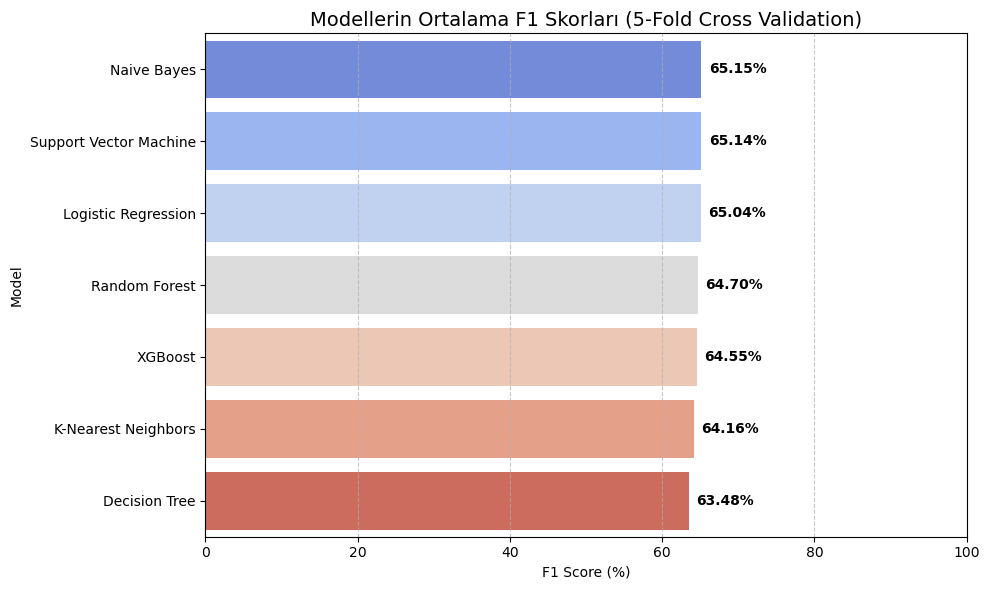

In [24]:
# Stratified Kfold yöntemi ile kurulmuş modeller

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)
results = []
#print("Model f1 Score:\n")
for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=cv, scoring=f1)
    mean_score = scores.mean() * 100
    results.append({'Model': name, 'F1 Score': mean_score})
    #print(f'{name}: {mean_score:.2f}%')

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='F1 Score', y='Model', data=results_df, palette='coolwarm')

for bar in ax.patches:
    ax.text(
        bar.get_width() + 1, 
        bar.get_y() + bar.get_height()/2, 
        f"{bar.get_width():.2f}%", 
        ha='left', va='center', 
        fontsize=10, color='black', weight='bold'
    )

plt.title('Modellerin Ortalama F1 Skorları (5-Fold Cross Validation)', fontsize=14)
plt.xlabel('F1 Score (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Logistic Regression

In [25]:
log_reg = LogisticRegression()
lr_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'max_iter': [100, 200, 300],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Set up GridSearchCV
grid_lr = GridSearchCV(estimator=log_reg, param_grid=lr_params, cv=5, n_jobs=-1, verbose=1)
grid_lr.fit(x_train, y_train)

print("En iyi parametreler:", grid_lr.best_params_)
print("En iyi F1 skoru:", grid_lr.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
En iyi parametreler: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
En iyi F1 skoru: 0.7417989417989418


## K-Nearest Neighbors

In [26]:
knn = KNeighborsClassifier()

knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(estimator=knn, param_grid=knn_params, cv=5, n_jobs=-1, verbose=1)
grid_knn.fit(x_train,y_train)

print("En iyi parametreler:", grid_knn.best_params_)
print("En iyi F1 skoru:", grid_knn.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
En iyi parametreler: {'metric': 'minkowski', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
En iyi F1 skoru: 0.6825396825396826


## Support Vector Machine

In [27]:
svm = SVC() # Fazla zaman aliyor bu sebeple randomized search kullanildi
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

grid_svm = RandomizedSearchCV(svm, svm_params, scoring='f1', cv=5, n_jobs=-1, verbose = 1)
grid_svm.fit(x_train, y_train)

print("En iyi parametreler:", grid_svm.best_params_)
print("En iyi F1 skoru:", grid_svm.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
En iyi parametreler: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'C': 10}
En iyi F1 skoru: 0.6668865852644013


## Naive Bayes

In [30]:
naive_params = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_nb = GridSearchCV(GaussianNB(), param_grid=naive_params, cv=5, scoring='f1')
grid_nb.fit(x_train, y_train)

print("En iyi parametre:", grid_nb.best_params_)
print("En iyi F1 skoru:", grid_nb.best_score_)

En iyi parametre: {'var_smoothing': 1e-09}
En iyi F1 skoru: 0.6520802813025042


## Random Forest

In [31]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],            
    'bootstrap': [True, False] # 
}

# Model ve K-Fold tanımı
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, scoring='f1', cv=cv, n_jobs=-1, verbose = 1)
grid_rf.fit(x_train, y_train)

# Sonuçlar
print("En iyi parametre:", grid_rf.best_params_)
print("En iyi F1 skoru:", grid_rf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Random Forest Params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score: 0.6643478409752422


## XGBoost

In [32]:

xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# GridSearchCV
grid_xgb = GridSearchCV(estimator=xgb, param_grid=xgb_params, scoring='f1', cv=cv, n_jobs=-1, verbose = 1)
grid_xgb.fit(x_train, y_train)

print("En iyi parametre:", grid_xgb.best_params_)
print("En iyi F1 skoru:", grid_xgb.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.6643812778200907


## Decision Tree

In [33]:
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_dt = GridSearchCV(estimator=dt, param_grid=dt_params, scoring='f1', cv=cv, n_jobs=-1, verbose = 1)
grid_dt.fit(x_train, y_train)

print("En iyi parametre:", grid_dt.best_params_)
print("En iyi F1 skoru:", grid_dt.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 10}
Best F1 Score: 0.6695013903383109


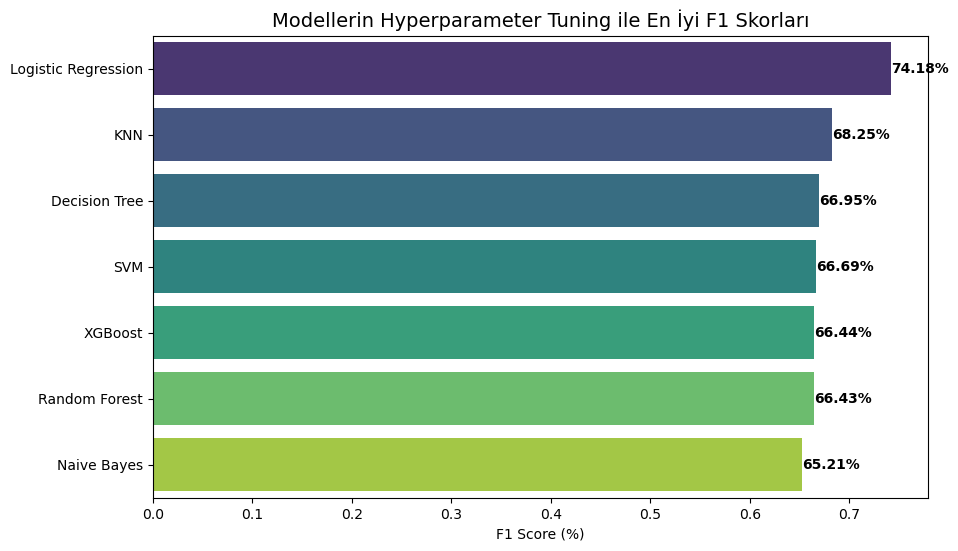

In [53]:
best_scores = {
    'Decision Tree': grid_dt.best_score_,
    'XGBoost': grid_xgb.best_score_,
    'Random Forest': grid_rf.best_score_,
    'Naive Bayes': grid_nb.best_score_,
    'SVM': grid_svm.best_score_,
    'KNN': grid_knn.best_score_,
    'Logistic Regression': grid_lr.best_score_
}
tuned_f1df = pd.DataFrame.from_dict(best_scores, orient='index', columns=['F1 Score'])
tuned_f1df = f1_df.sort_values(by='F1 Score', ascending=False)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=tuned_f1df['F1 Score'],y=tuned_f1df.index, palette='viridis')
plt.title('Modellerin Hyperparameter Tuning ile En İyi F1 Skorları', fontsize=14)
plt.xlabel('F1 Score (%)')

for bar in ax.patches:
    width = bar.get_width() # Bar uzunlugu
    y = bar.get_y() + bar.get_height() / 2 # Barin ortasi
    ax.text(width,y,f'{width*100:.2f}%',
           ha = 'left',
           va = 'center',
           fontsize=10, color='black', weight='bold')
plt.show()